# Оптимизация в Python. Минимизация негладкой функции.

Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

<b>Вы научитесь:</b>
1. применять библиотеку SciPy для минимизации функций
2. делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

<b>Введение</b>

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

<b>Материалы</b>

1. Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
2. Matplotlib User Guide: http://matplotlib.org/users/index.html

<b>Инструкция по выполнению</b>

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

<b>Задача 3. Минимизация негладкой функции</b>
1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального 4. приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
5. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
6. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
7. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [1]:
import math
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

In [2]:
def f_plt(x):
    return (np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)).astype(int)

In [3]:
def f_opt(x):
    return int(math.sin(x[0] / 5.) * math.exp(x[0] / 10.) + 5 * math.exp(-x[0] / 2.))

In [4]:
x_axis = np.arange(1, 30, 0.01)
f_axis = f_plt(x_axis)

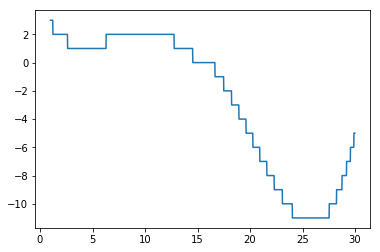

In [5]:
plt.plot(x_axis, f_axis)

In [6]:
bfgs_min = opt.minimize(f_opt, 30, method='BFGS').fun

In [7]:
evol_min = opt.differential_evolution(f_opt, [(1,30)]).fun

In [8]:
output_file = open('task_3.txt', 'w')
output_file.write(" ".join([str(round(bfgs_min, 2)), str(round(evol_min, 2))]))
output_file.close()